<a href="https://colab.research.google.com/github/Cehiim/ReconhecimentoDeEntidades/blob/main/Projeto_semestral_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg"  width=300, align="right">
<br>
<br>
<br>
<br>
<br>

# **Template para o Colab do Projeto Semestral**
---

Atenção, podem ser que nem todas as tarefas sejam executadas no Colab (a aplicação por exemplo, pode estar hospedada no streamlit cloud). Mas a maior parte pode estar aqui ou ao menos indicada e comentada.


Além disso a entrega deve incluir:

1. **Um GitHub público do projeto**
2. **Código completo e executável em um notebook Python (este template)**
3. **Uma aplicação streamlit para consumo do modelo**
4. **Um texto/artigo do projeto**
5. **Um vídeo (link YouTube ou outro) de no máximo 3min de apresentação do projeto**

Um **`readme.md`** no GitHub público do projeto deve indicar (um índice) cada uma dessas entregas.








In [ ]:
#@title **Identificação do Grupo**

#@markdown Integrantes do Grupo, nome completo em orgem alfabética (*informe \<RA\>,\<nome\>*)
Aluno1 = '10402758, Cesar Hideki Imai' #@param {type:"string"}
Aluno2 = 'None' #@param {type:"string"}
Aluno3 = 'None' #@param {type:"string"}
Aluno4 = 'None' #@param {type:"string"}
Aluno5 = 'None' #@param {type:"string"}



In [ ]:
#@title Assinale aqui a sua opção de Projeto
Projeto = "IA Aplicada a Documentos: Uso de Grandes Modelos de Linguagem Abertos" #@param ["IA Aplicada a Imagens: Uso de Modelos de Redes Neurais", "IA Aplicada a Documentos: Uso de Grandes Modelos de Linguagem Abertos"]




# **Resumo**

Apresente um "abstract" do seu projeto.

1. Objetivo do projeto
2. Fontes dos dados e dados originais (coletados)
3. Ferramentas/pacotes de IA a serem utilizados para a construção da solução
4. Um prévia dos resultados.

O objetivo deste projeto é desenvolver uma aplicação que identifica e extrai as entidades específicas contidas num texto, como pessoas, locais e organizações. Para isso foi feito *fine-tuning* do modelo BERTimbau para a tarefa de *Named Entity Recognition* (NER) usando um *dataset* criado com informações consolidadas de diversos arquivos em português. Para a preparação dos dados foram usadas as biblioteca `datasets` e `pandas`. Para o treinamento do modelo foram usadas as bibliotecas `transformers` e `accelerate`, com essa última usada para otimizar o treino. Já para a validação foram usadas as bibliotecas `seqeval` e `numpy`. O modelo refinado obteve uma acurácia de 98% e F1-score de 97% para o conjunto de teste. Além disso foi usada a biblioteca `streamlit` para construir uma aplicação com o modelo.

# **Apresentação dos dados**

Inclua link, amostras dos dados.

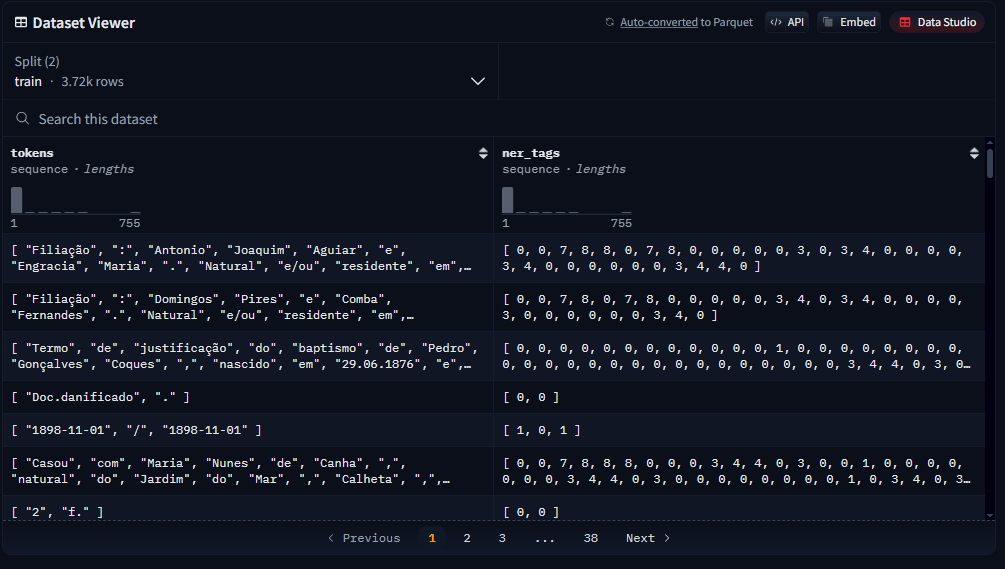

**Variáveis**:
- `tokens`: Amostras de textos.
- `ner_tags`: Representação de *tags* de cada *token* do texto.

**Tags**:
0. **O**
1. **B-Data**
2. **I-Data**
3. **B-Local**
4. **I-Local**
5. **B-Organizacao**
6. **I-Organizacao**
7. **B-Pessoa**
8. **I-Pessoa**
9. **B-Profissao**
10. **I-Profissao**

Dataset utilizado: https://huggingface.co/datasets/lfcc/portuguese_ner/blob/main/README.md

# Abaixo algumas seções de exemplo

> Pode haver mais, dependendo da sua aplicação. Para cada seção faça comentários explicando a tarefa e comentando/sumarizando os resultados.

# **Importação das dependências**

In [ ]:
# Instalando bibliotecas
%pip install -q datasets transformers accelerate seqeval streamlit

# Importando dados do repositório
!git clone https://huggingface.co/datasets/lfcc/portuguese_ner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 95.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 129.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 115.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.6 MB/s eta 0:00:00
   ━━

# **Preparação e transformação dos dados**



## **Definindo conjunto de dados**

In [ ]:
import pandas as pd
from datasets import Dataset

# No Google Colab não é possível importar os dados diretamente como Datasets
# Carregando dados como DataFrames
train_df = pd.read_parquet("/content/portuguese_ner/data/train-00000-of-00001.parquet")
test_df = pd.read_parquet("/content/portuguese_ner/data/test-00000-of-00001.parquet")

# Convertendo para Datasets
train_ds = Dataset.from_pandas(train_df)
test_ds = Dataset.from_pandas(test_df)

# Tags informadas no README.md do repositório
ner_tags = [
  'O', # 0
  'B-Data', # 1
  'I-Data', # 2
  'B-Local', # 3
  'I-Local', # 4
  'B-Organizacao', # 5
  'I-Organizacao', # 6
  'B-Pessoa', # 7
  'I-Pessoa', # 8
  'B-Profissao', # 9
  'I-Profissao' # 10
]

# Amostra
print("Sequência de texto:\n", train_ds[0]['tokens'])
print("Contagem:", len(train_ds[0]['tokens']))
print("\nSequência de tags:\n", train_ds[0]['ner_tags'])
print("Contagem:", len(train_ds[0]['ner_tags']))

Sequência de texto:
 ['Filiação', ':', 'Antonio', 'Joaquim', 'Aguiar', 'e', 'Engracia', 'Maria', '.', 'Natural', 'e/ou', 'residente', 'em', 'CUNHA', ',', 'Santa', 'Maria', ',', 'actual', 'concelho', 'de', 'PAREDES', 'COURA', 'e', 'distrito', '(', 'ou', 'país', ')', 'Viana', 'do', 'Castelo', '.']
Contagem: 33

Sequência de tags:
 [0, 0, 7, 8, 8, 0, 7, 8, 0, 0, 0, 0, 0, 3, 0, 3, 4, 0, 0, 0, 0, 3, 4, 0, 0, 0, 0, 0, 0, 3, 4, 4, 0]
Contagem: 33


## **Definindo modelos**

In [ ]:
from transformers import AutoTokenizer, AutoModelForTokenClassification, TrainingArguments, DataCollatorForTokenClassification, Trainer

# Definindo tokenizador
model_path = 'neuralmind/bert-base-portuguese-cased'
tokenizer = AutoTokenizer.from_pretrained(model_path)

# Definindo as tags no modelo
id2label = {str(i): label for i, label in enumerate(ner_tags)}
label2id = {label: str(i) for i, label in enumerate(ner_tags)}

# Definindo modelo-base (não foi treinado para Token Classification)
model = AutoModelForTokenClassification.from_pretrained(
    model_path,
    num_labels=len(ner_tags),
    id2label=id2label,
    label2id=label2id
)

tokenizer_config.json:   0%|          | 0.00/43.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/647 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/210k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

Some weights of BertForTokenClassification were not initialized from the model checkpoint at neuralmind/bert-base-portuguese-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Não há um limite explícito de tokens configurado no tokenizador
print("Limite de tokens definido no tokenizador:", tokenizer.model_max_length)

# Portanto pode causar erros para sequências mais longas que o limite do modelo
print("Limite de tokens definido no modelo:", model.config.max_position_embeddings)

Limite de tokens definido no tokenizador: 1000000000000000019884624838656
Limite de tokens definido no modelo: 512


In [ ]:
# Definindo o limite do tokenizador de acordo com o modelo
tokenizer.model_max_length = 512

## **Preparando dados**

In [ ]:
# Amostra tokenizada
print("Sequência de texto:\n", train_ds[0]['tokens'])
print("Contagem:", len(train_ds[0]['tokens']))
print("\nSequência tokenizada:\n", tokenizer(train_ds[0]['tokens'], is_split_into_words=True)['input_ids'])
print("Contagem:", len(tokenizer(train_ds[0]['tokens'], is_split_into_words=True)['input_ids']))

Sequência de texto:
 ['Filiação', ':', 'Antonio', 'Joaquim', 'Aguiar', 'e', 'Engracia', 'Maria', '.', 'Natural', 'e/ou', 'residente', 'em', 'CUNHA', ',', 'Santa', 'Maria', ',', 'actual', 'concelho', 'de', 'PAREDES', 'COURA', 'e', 'distrito', '(', 'ou', 'país', ')', 'Viana', 'do', 'Castelo', '.']
Contagem: 33

Sequência tokenizada:
 [101, 1656, 3347, 131, 5523, 6046, 18961, 122, 4216, 10780, 151, 1479, 119, 11019, 122, 120, 291, 17642, 173, 187, 11964, 18394, 117, 1838, 1479, 117, 8852, 5892, 125, 18868, 7286, 7545, 22308, 6213, 15289, 22301, 122, 3410, 113, 291, 806, 114, 13056, 171, 5463, 119, 102]
Contagem: 47


In [ ]:
# Pré-processamento dos dados
def pre_processing(sample, label_all_tokens=True):

  # Tokenizando sequência de texto
  tokenized = tokenizer(sample['tokens'], is_split_into_words=True, truncation=True)

  labels = []
  for i, label in enumerate(sample['ner_tags']):
    word_ids = tokenized.word_ids(batch_index=i)
    previous_word_idx = None
    label_ids = []
    for word_idx in word_ids:
      if word_idx is None:
        label_ids.append(-100)

      elif word_idx != previous_word_idx:
        label_ids.append(label[word_idx])

      else:
        label_ids.append(label[word_idx] if label_all_tokens else -100)

      previous_word_idx = word_idx

    labels.append(label_ids)

  tokenized['labels'] = labels

  return tokenized

# Amostra pré-processada
sample = pre_processing(train_ds[0:1])
print("Sequência segmentada:\n", tokenizer.convert_ids_to_tokens(sample['input_ids'][0]))
print("Contagem:", len(tokenizer.convert_ids_to_tokens(sample['input_ids'][0])))
print("\nSequência tokenizada:\n", sample['input_ids'][0])
print("Contagem:", len(sample['input_ids'][0]))
print("\nSequência de tags:\n", sample['labels'][0])
print("Contagem:", len(sample['labels'][0]))

Sequência segmentada:
 ['[CLS]', 'Fil', '##iação', ':', 'Antonio', 'Joaquim', 'Aguiar', 'e', 'Eng', '##rac', '##ia', 'Maria', '.', 'Natural', 'e', '/', 'ou', 'residente', 'em', 'C', '##UN', '##HA', ',', 'Santa', 'Maria', ',', 'actual', 'concelho', 'de', 'PA', '##RE', '##DE', '##S', 'CO', '##UR', '##A', 'e', 'distrito', '(', 'ou', 'país', ')', 'Viana', 'do', 'Castelo', '.', '[SEP]']
Contagem: 47

Sequência tokenizada:
 [101, 1656, 3347, 131, 5523, 6046, 18961, 122, 4216, 10780, 151, 1479, 119, 11019, 122, 120, 291, 17642, 173, 187, 11964, 18394, 117, 1838, 1479, 117, 8852, 5892, 125, 18868, 7286, 7545, 22308, 6213, 15289, 22301, 122, 3410, 113, 291, 806, 114, 13056, 171, 5463, 119, 102]
Contagem: 47

Sequência de tags:
 [-100, 0, 0, 0, 7, 8, 8, 0, 7, 7, 7, 8, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 3, 4, 0, 0, 0, 0, 3, 3, 3, 3, 4, 4, 4, 0, 0, 0, 0, 0, 0, 3, 4, 4, 0, -100]
Contagem: 47


In [ ]:
# Tokenizando todos os dados
train_ds = train_ds.map(pre_processing, batched=True)
test_ds = test_ds.map(pre_processing, batched=True)

Map:   0%|          | 0/3716 [00:00<?, ? examples/s]

Map:   0%|          | 0/930 [00:00<?, ? examples/s]

# **Fine Tuning do modelo**


In [ ]:
# Hiperparâmetros
lr = 0.00002
batch_size = 16
n_epochs = 4
wd = 0.01
strategy = 'epoch'

# Parâmetros de treinamento
training_args = TrainingArguments(
    output_dir='/content/results',
    num_train_epochs=n_epochs,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    learning_rate=lr,
    weight_decay = wd,
    eval_strategy=strategy,
    save_strategy=strategy,
    logging_strategy=strategy,
    load_best_model_at_end=True
)

In [ ]:
# Ajusta o tamanho das sequências no batch para que todas tenham o mesmo comprimento
# Modelos como BERT exigem tensores com tamanho uniforme
data_collator = DataCollatorForTokenClassification(tokenizer)

In [ ]:
# Definindo treinamento
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=test_ds,
    processing_class=tokenizer,
    data_collator=data_collator
)

trainer.train()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: cehiim (cehiim-mackenzie) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss
1,0.263800,0.084516
2,0.055300,0.076806
3,0.037600,0.075939
4,0.028600,0.072862


TrainOutput(global_step=932, training_loss=0.09632714725870943, metrics={'train_runtime': 465.4692, 'train_samples_per_second': 31.933, 'train_steps_per_second': 2.002, 'total_flos': 875135668519608.0, 'train_loss': 0.09632714725870943, 'epoch': 4.0})

In [ ]:
# Salvando o tokenizador numa pasta 'tokenizer'
tokenizer.save_pretrained("/content/tokenizer")

# Salvando modelo refinado numa pasta 'model'
trainer.save_model("/content/model")

# **Avaliação do modelo**



In [ ]:
from seqeval.metrics import classification_report, accuracy_score, f1_score
import numpy as np

# Extraindo as predições e os rótulos
predictions, labels, _ = trainer.predict(test_ds)

preds = np.argmax(predictions, axis=2)

true_labels = []
true_predictions = []

for pred, label in zip(preds, labels):
    curr_preds = []
    curr_labels = []

    for p, l in zip(pred, label):
        if l != -100:
            curr_preds.append(ner_tags[p])
            curr_labels.append(ner_tags[l])

    true_predictions.append(curr_preds)
    true_labels.append(curr_labels)

print(classification_report(true_labels, true_predictions))
print("F1-score:", f1_score(true_labels, true_predictions))
print("Acurácia:", accuracy_score(true_labels, true_predictions))

              precision    recall  f1-score   support

        Data       0.99      0.99      0.99      2109
       Local       0.98      0.98      0.98      2593
 Organizacao       0.72      0.85      0.78       203
      Pessoa       0.97      0.98      0.97      2028
   Profissao       0.79      0.85      0.82       231

   micro avg       0.96      0.98      0.97      7164
   macro avg       0.89      0.93      0.91      7164
weighted avg       0.96      0.98      0.97      7164

F1-score: 0.9701337398655671
Acurácia: 0.9832975279130988


# **Consumo do modelo**

## **Exemplo**

In [ ]:
from transformers import pipeline

# Importando tokenizador
tokenizer2 = AutoTokenizer.from_pretrained('/content/model')

# Importando modelo refinado
model_tuned = AutoModelForTokenClassification.from_pretrained('/content/tokenizer')

pipe = pipeline('ner', model=model_tuned, tokenizer=tokenizer2, aggregation_strategy="simple")

Device set to use cuda:0


In [ ]:
example = 'João da Silva, engenheiro de software na Google, participou da conferência de inteligência artificial realizada em São Paulo no dia 12 de maio de 2023.'
result = pipe(example)
for i, token in enumerate(result):
  print(f"{result[i]['word']} --- {result[i]['entity_group']}")

João da Silva --- Pessoa
engenheiro --- Profissao
Google --- Organizacao
São --- Local
Paulo --- Local
12 de maio de 2023 --- Data


## Aplicação

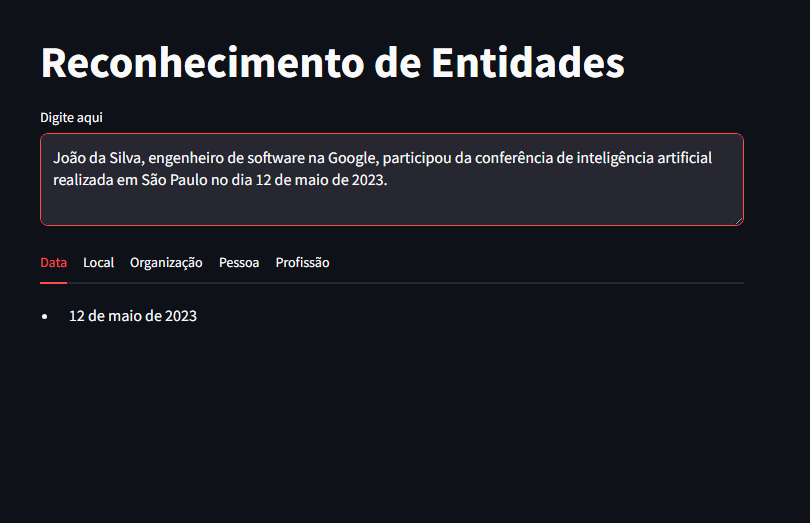

A aplicação pode ser acessada neste repositório: https://github.com/Cehiim/ReconhecimentoDeEntidades

# **Referências**

Este é um item obrigatório. Inclua aqui o as referências, fontes, ou bibliografia e sites/bibliotecas que foram empregados para construir a sua proposta.

- HUGGING FACE. Transformers – Documentation. Disponível em: https://huggingface.co/docs/transformers/index. Acesso em: 31 maio 2025.

- HUGGING FACE. Datasets – Documentation. Disponível em: https://huggingface.co/docs/datasets/index. Acesso em: 31 maio 2025.

- STREAMLIT. Documentation. Disponível em: https://docs.streamlit.io/. Acesso em: 31 maio 2025.

- CHAKKI-WORKS. seqeval: A Python framework for sequence labeling evaluation. GitHub, 2023. Disponível em: https://github.com/chakki-works/seqeval. Acesso em: 31 maio 2025.

- JSVINE. pdfplumber: Plumb a PDF for detailed information about each element. GitHub, 2025. Disponível em: https://github.com/jsvine/pdfplumber. Acesso em: 31 maio 2025.

- CUNHA, Luís Filipe; RAMALHO, José Carlos. NER in Archival Finding Aids: Extended. Machine Learning and Knowledge Extraction, Basel, v. 4, n. 1, p. 42–65, 2022. Disponível em: https://www.mdpi.com/2504-4990/4/1/3. Acesso em: 31 maio 2025. DOI: 10.3390/make4010003. ISSN 2504-4990.

- SOUZA, Fábio; NOGUEIRA, Rodrigo; LOTUFO, Roberto. BERTimbau: pretrained BERT models for Brazilian Portuguese. In: 9th Brazilian Conference on Intelligent Systems (BRACIS), 2020, Rio Grande do Sul.

- TALEBI, Shaw. Fine-Tuning BERT for Text Classification (w/ Example Code). YouTube, 17 out. 2024. Disponível em: https://youtu.be/4QHg8Ix8WWQ?si=IV6URzV_kuTOJZdo. Acesso em: 31 maio 2025.

- ROHAN-PAUL-AI. Fine Tuning BERT for Named Entity Recognition (NER) | NLP | Data Science | Machine Learning. YouTube, 22 set. 2022. Disponível em: https://youtu.be/dzyDHMycx_c?si=C3dK8e7Ezqhv5BJ8. Acesso em: 31 maio 2025.

---

In [ ]:
#@title **Avaliação**
GitHub = 10 #@param {type:"slider", min:0, max:10, step:1}

Implementacao_Model_Code = 7 #@param {type:"slider", min:0, max:10, step:1}

Aplicacao_Streamlit = 9 #@param {type:"slider", min:0, max:10, step:1}

Texto_Artigo  = 6 #@param {type:"slider", min:0, max:10, step:1}

Video = 7 #@param {type:"slider", min:0, max:10, step:1}

Geral = 7 #@param {type:"slider", min:0, max:10, step:1}








In [ ]:
#@title **Nota Final**

nota = 2*GitHub + 4*Implementacao_Model_Code + 2*Aplicacao_Streamlit + 1*Texto_Artigo + 1*Video

nota = nota / 10

print(f'Nota final do trabalho {nota :.1f}')

import numpy as np
import pandas as pd

alunos = pd.DataFrame()

lista_tia = []
lista_nome = []

for i in range(1,6):
  exec("if Aluno" + str(i) + " !='None':  lista = Aluno" + str(i) + ".split(','); lista_tia.append(lista[0]); lista_nome.append(lista[1].upper())")

alunos['tia'] = lista_tia
alunos['nome'] = lista_nome
alunos['nota'] = np.round(nota,1)
print()
display(alunos)